# Олимпиада: Я - профессионал 2020
## Секция - Машинное обучение
### Отборочный этап
#### Задача №1
В базе данных нефтегазовых месторождений одной компании произошёл системный сбой и информация о типе месторождения по расположению (на берегу или в открытом море) была удалена. Так как эта информация крайне важна, вам необходимо восстановить её в пострадавшем датасете

`Tectonic regime` – тектонический режим месторождения  
`Onshore/Oﬀshore` – тип месторождения по расположению  
`Hydrocarbon type` – тип углеводородов  
`Reservoir status` – статус разработки месторождения  
`Structural setting` – структурные особенности месторождения  
`Depth` – средняя глубина кровли резервуара  
`Period` – геологическая система образования резервуара  
`Litholog`y – основной литологический состав коллектора   
`Gross` – среднее значение общей толщины резервуара  
`Netpay` – среднее значение эффективной углеводородонасыщенной толщины коллектора  
`Porosity` – среднее значение матричной пористости  
`Permeability` – среднее значение проницаемости по воздуху.  

Выходные данные: файл prediction.csv, в котором одна колонка (без заголовка) с предсказанием поля Onshore/Oﬀshore. Предсказания следует выводить в тех же значениях, в каких они представлены в тренировочном датасете (ONSHORE/OFFSHORE/ ONSHORE-OFFSHORE).

In [38]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [39]:
data = pd.read_csv('D:\\DataMining\\occurrence\\train.csv')
data.head()

,Tectonic regime,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Period,Lithology,Gross,Netpay,Porosity,Permeability
0,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,OFFSHORE,OIL,DEVELOPING,INVERSION/WRENCH,3520,NEOGENE,SANDSTONE,2460.0,220.0,20.0,45.0
1,GRAVITY/EXTENSION/EVAPORITE,OFFSHORE,OIL,MATURE PRODUCTION,SALT/PASSIVE MARGIN,9967,CRETACEOUS,LIMESTONE,427.0,160.0,19.0,175.0
2,GRAVITY/EXTENSION/EVAPORITE,ONSHORE,OIL,MATURE PRODUCTION,PASSIVE MARGIN,8700,CRETACEOUS,LIMESTONE,95.0,15.0,12.0,20.0
3,COMPRESSION,ONSHORE,OIL,DECLINING PRODUCTION,THRUST,5084,CRETACEOUS,SANDSTONE,328.0,300.0,13.0,600.0
4,INVERSION/COMPRESSION/EXTENSION,ONSHORE,OIL,DECLINING PRODUCTION,INVERSION/RIFT,1030,CRETACEOUS,SANDSTONE,260.0,33.0,24.0,182.0


In [40]:
data.shape

(309, 12)

In [41]:
data['Lithology'].value_counts().to_dict()

{'SANDSTONE': 180,
 'LIMESTONE': 42,
 'DOLOMITE': 38,
 'LOW-RESISTIVITY SANDSTONE': 9,
 'CONGLOMERATE': 7,
 'CHALK': 7,
 'CHALKY LIMESTONE': 6,
 'THINLY-BEDDED SANDSTONE': 6,
 'SILTSTONE': 3,
 'SHALY SANDSTONE': 3,
 'VOLCANICS': 2,
 'DOLOMITIC LIMESTONE': 2,
 'BASEMENT': 1,
 'CHERT': 1,
 'SHALE': 1,
 'DIATOMITE': 1}

In [42]:
dict_Tectonic_regime = data['Tectonic regime'].value_counts().to_dict()
dict_Tectonic_regime

{'COMPRESSION': 58,
 'EXTENSION': 32,
 'COMPRESSION/EROSION': 27,
 'INVERSION/COMPRESSION/EXTENSION': 25,
 'COMPRESSION/EVAPORITE': 23,
 'GRAVITY/EXTENSION/EVAPORITE/SYNSEDIMENTATION': 12,
 'EXTENSION/EROSION': 11,
 'GRAVITY/EXTENSION/EVAPORITE': 9,
 'STRIKE-SLIP/TRANSPRESSION/BASEMENT-I': 7,
 'INVERSION/COMPRESSION/EXTENSION/EVAPORITE': 7,
 'INVERSION/COMPRESSION/EXTENSION/EROSION': 6,
 'INVERSION/COMPRESSION/EXTENSION/EVAPORITE/GRAVITY': 5,
 'COMPRESSION/EVAPORITE/EXTENSION/LINKED': 5,
 'COMPRESSION/EXTENSION/LINKED': 5,
 'GRAVITY/EVAPORITE/COMPRESSION': 5,
 'GRAVITY/EXTENSION/EVAPORITE/DIAPIR/SYNSEDIMENTATION': 4,
 'GRAVITY/EVAPORITE/EXTENSION': 4,
 'INVERSION/STRIKE-SLIP/TRANSPRESSION/EXTENSION/BASEMENT-I': 4,
 'COMPRESSION/STRIKE-SLIP/TRANSPRESSION/BASEMENT-I': 3,
 'EXTENSION/EVAPORITE': 3,
 'EXTENSION/EVAPORITE/GRAVITY': 3,
 'GRAVITY/SHALE/EXTENSION/SYNSEDIMENTATION': 3,
 'COMPRESSION/GRAVITY/EVAPORITE/EXTENSION/LINKED': 3,
 'STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEMENT-I': 

In [43]:
dict_Structural_setting = data['Structural setting'].value_counts().to_dict()
dict_Structural_setting

{'FORELAND': 71,
 'RIFT': 48,
 'INTRACRATONIC': 28,
 'PASSIVE MARGIN': 16,
 'INVERSION/RIFT': 15,
 'THRUST': 14,
 'SALT/FORELAND': 13,
 'SALT/PASSIVE MARGIN': 11,
 'DELTA/PASSIVE MARGIN': 6,
 'SALT/INVERSION/RIFT': 5,
 'DELTA/SALT/PASSIVE MARGIN': 5,
 'INVERSION/BACKARC': 5,
 'BACKARC': 4,
 'SUB-SALT/INVERSION': 4,
 'THRUST/FORELAND': 4,
 'SALT/RIFT': 4,
 'RIFT/PASSIVE MARGIN': 3,
 'WRENCH': 3,
 'WRENCH/FORELAND': 3,
 'WRENCH/DELTA': 3,
 'SUB-SALT/FORELAND': 3,
 'SUB-SALT/RIFT': 3,
 'INVERSION/FORELAND': 3,
 'SUB-THRUST/FORELAND': 2,
 'SUB-SALT': 2,
 'WRENCH/RIFT': 2,
 'SUB-THRUST': 2,
 'THRUST/SUB-THRUST/FORELAND': 2,
 'THRUST/WRENCH': 2,
 'RIFT/SALT': 2,
 'INVERSION/WRENCH': 2,
 'FORELAND/THRUST': 2,
 'FORELAND/SALT': 2,
 'DELTA/SUB-SALT/PASSIVE MARGIN': 1,
 'RIFT/INVERSION': 1,
 'SALT/INVERSION/FORELAND': 1,
 'DELTA/WRENCH': 1,
 'DELTA/FORELAND': 1,
 'DELTA//FORELAND': 1,
 'FORELAND/WRENCH': 1,
 'SUB-SALT/PASSIVE MARGIN': 1,
 'FORELAND/PASSIVE MARGIN': 1,
 'INTRACRATONIC/SUB-SALT': 

In [44]:
set_Tectonic_regime = []
for elem in dict_Tectonic_regime.keys():
    set_Tectonic_regime.extend(elem.split('/'))
set_Tectonic_regime = set(set_Tectonic_regime)
set_Tectonic_regime.discard('')
set_Tectonic_regime 

{'BASEMENT-I',
 'COMPRESSION',
 'DIAPIR',
 'EROSION',
 'EVAPORITE',
 'EXTENSION',
 'GRAVITY',
 'INVERSION',
 'LINKED',
 'REACTIVATION',
 'SHALE',
 'STRIKE-SLIP',
 'SYNSEDIMENTATION',
 'TRANSPRESSION',
 'TRANSTENSION',
 'UPLIFT'}

In [45]:
set_Structural_setting = []
for elem in dict_Structural_setting.keys():
    set_Structural_setting.extend(elem.split('/'))
set_Structural_setting = set(set_Structural_setting)
set_Structural_setting.discard('')
set_Structural_setting

{'BACKARC',
 'DELTA',
 'FOREARC',
 'FORELAND',
 'INTRACRATONIC',
 'INVERSION',
 'PASSIVE MARGIN',
 'RIFT',
 'SALT',
 'SUB-SALT',
 'SUB-THRUST',
 'THRUST',
 'WRENCH'}

In [46]:
def transformation_data_structural_setting_and_tectonic_regime(data_init):
    init_structural_setting = data_init['Structural setting']
    init_tectonic_regime = data_init['Tectonic regime']
    del data_init['Structural setting']
    del data_init['Tectonic regime']
    Structural_setting = {}
    Tectonic_regime = {}
    for elem_Structural_setting in set_Structural_setting:
        for elem in init_structural_setting:
            if not(elem_Structural_setting in Structural_setting):
                Structural_setting[elem_Structural_setting] = [1 if elem_Structural_setting in elem.split('/') else 0]
            else:
                Structural_setting[elem_Structural_setting].append(1 if elem_Structural_setting in elem.split('/') else 0)
    for elem_Tectonic_regime in set_Tectonic_regime:
        for elem in init_tectonic_regime:
            if not(elem_Tectonic_regime in Tectonic_regime):
                Tectonic_regime[elem_Tectonic_regime] = [1 if elem_Tectonic_regime in elem.split('/') else 0]
            else:
                Tectonic_regime[elem_Tectonic_regime].append(1 if elem_Tectonic_regime in elem.split('/') else 0)
    for name_column, values in Structural_setting.items():
        data_init[name_column] = values
    for name_column, values in Tectonic_regime.items():
        data_init[name_column] = values
transformation_data_structural_setting_and_tectonic_regime(data)
data.head()

,Onshore/Offshore,Hydrocarbon type,Reservoir status,Depth,Period,Lithology,Gross,Netpay,Porosity,Permeability,...,DIAPIR,SHALE,UPLIFT,EXTENSION,EVAPORITE,GRAVITY,BASEMENT-I,LINKED,REACTIVATION,TRANSPRESSION
0,OFFSHORE,OIL,DEVELOPING,3520,NEOGENE,SANDSTONE,2460.0,220.0,20.0,45.0,...,0,0,0,0,0,0,1,0,0,1
1,OFFSHORE,OIL,MATURE PRODUCTION,9967,CRETACEOUS,LIMESTONE,427.0,160.0,19.0,175.0,...,0,0,0,1,1,1,0,0,0,0
2,ONSHORE,OIL,MATURE PRODUCTION,8700,CRETACEOUS,LIMESTONE,95.0,15.0,12.0,20.0,...,0,0,0,1,1,1,0,0,0,0
3,ONSHORE,OIL,DECLINING PRODUCTION,5084,CRETACEOUS,SANDSTONE,328.0,300.0,13.0,600.0,...,0,0,0,0,0,0,0,0,0,0
4,ONSHORE,OIL,DECLINING PRODUCTION,1030,CRETACEOUS,SANDSTONE,260.0,33.0,24.0,182.0,...,0,0,0,1,0,0,0,0,0,0


In [47]:
data.columns

Index(['Onshore/Offshore', 'Hydrocarbon type', 'Reservoir status', 'Depth',
       'Period', 'Lithology', 'Gross', 'Netpay', 'Porosity', 'Permeability',
       'SALT', 'FORELAND', 'THRUST', 'RIFT', 'INVERSION', 'WRENCH',
       'SUB-THRUST', 'FOREARC', 'PASSIVE MARGIN', 'SUB-SALT', 'DELTA',
       'INTRACRATONIC', 'BACKARC', 'SYNSEDIMENTATION', 'TRANSTENSION',
       'EROSION', 'STRIKE-SLIP', 'COMPRESSION', 'DIAPIR', 'SHALE', 'UPLIFT',
       'EXTENSION', 'EVAPORITE', 'GRAVITY', 'BASEMENT-I', 'LINKED',
       'REACTIVATION', 'TRANSPRESSION'],
      dtype='object')

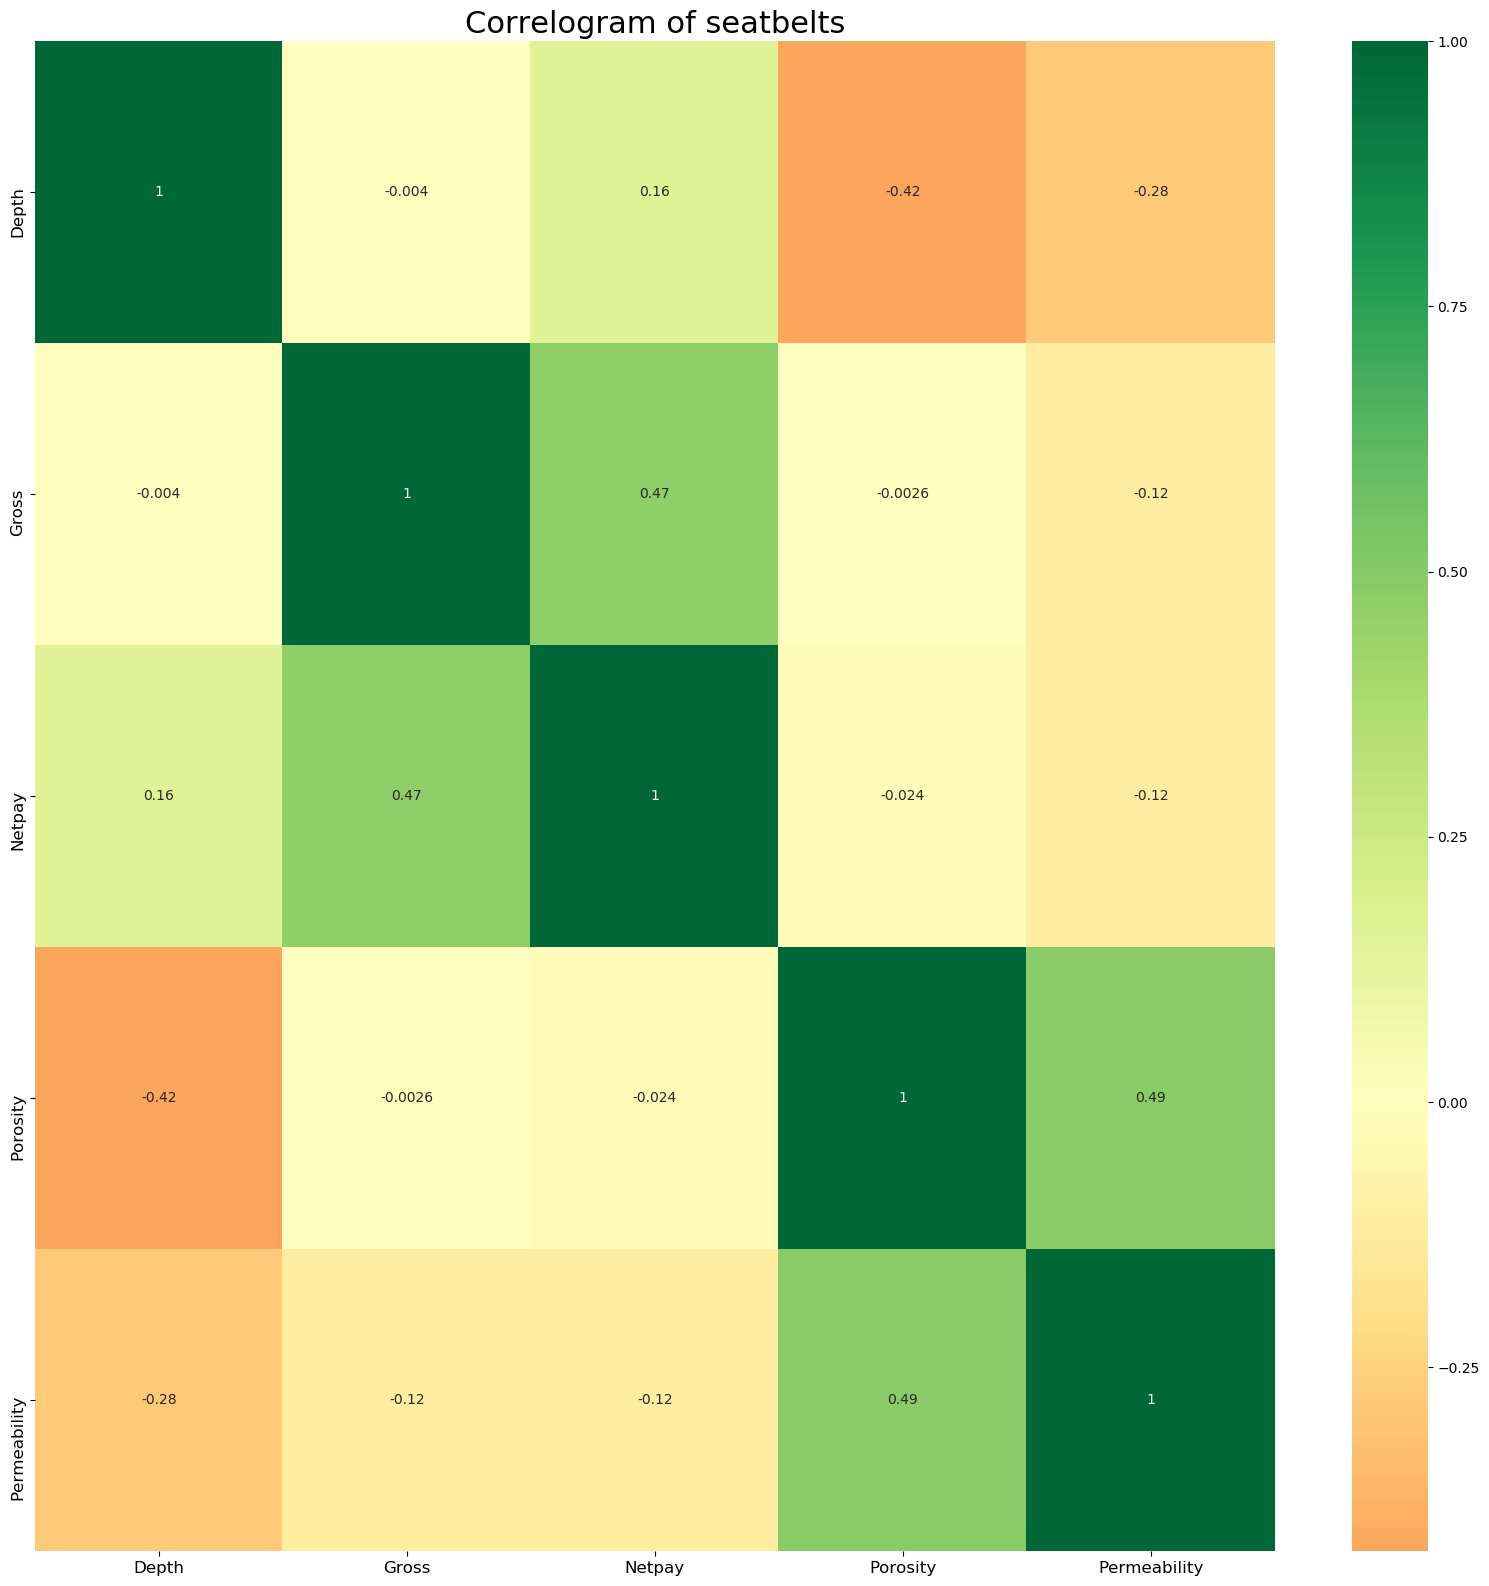

In [48]:
data_s = data[['Depth','Gross','Netpay','Porosity','Permeability']]
plt.figure()
sns.heatmap(data_s.corr(), xticklabels=data_s.corr().columns, yticklabels=data_s.corr().columns, 
            cmap='RdYlGn', center=0, annot=True)
plt.title('Correlogram of seatbelts', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


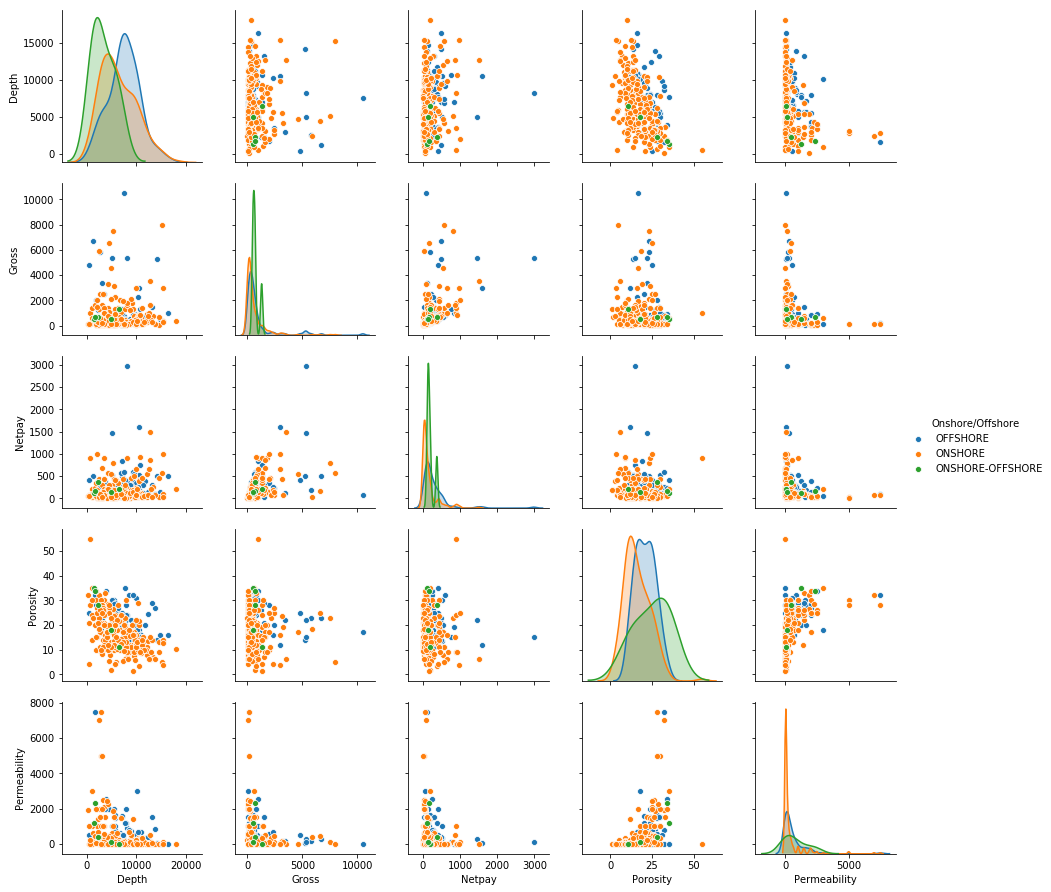

In [49]:
%matplotlib inline
sns.pairplot(data[['Depth','Gross','Netpay','Porosity','Permeability','Onshore/Offshore']], hue='Onshore/Offshore');
plt.show()

C:\WPy-3670\python-3.6.7\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


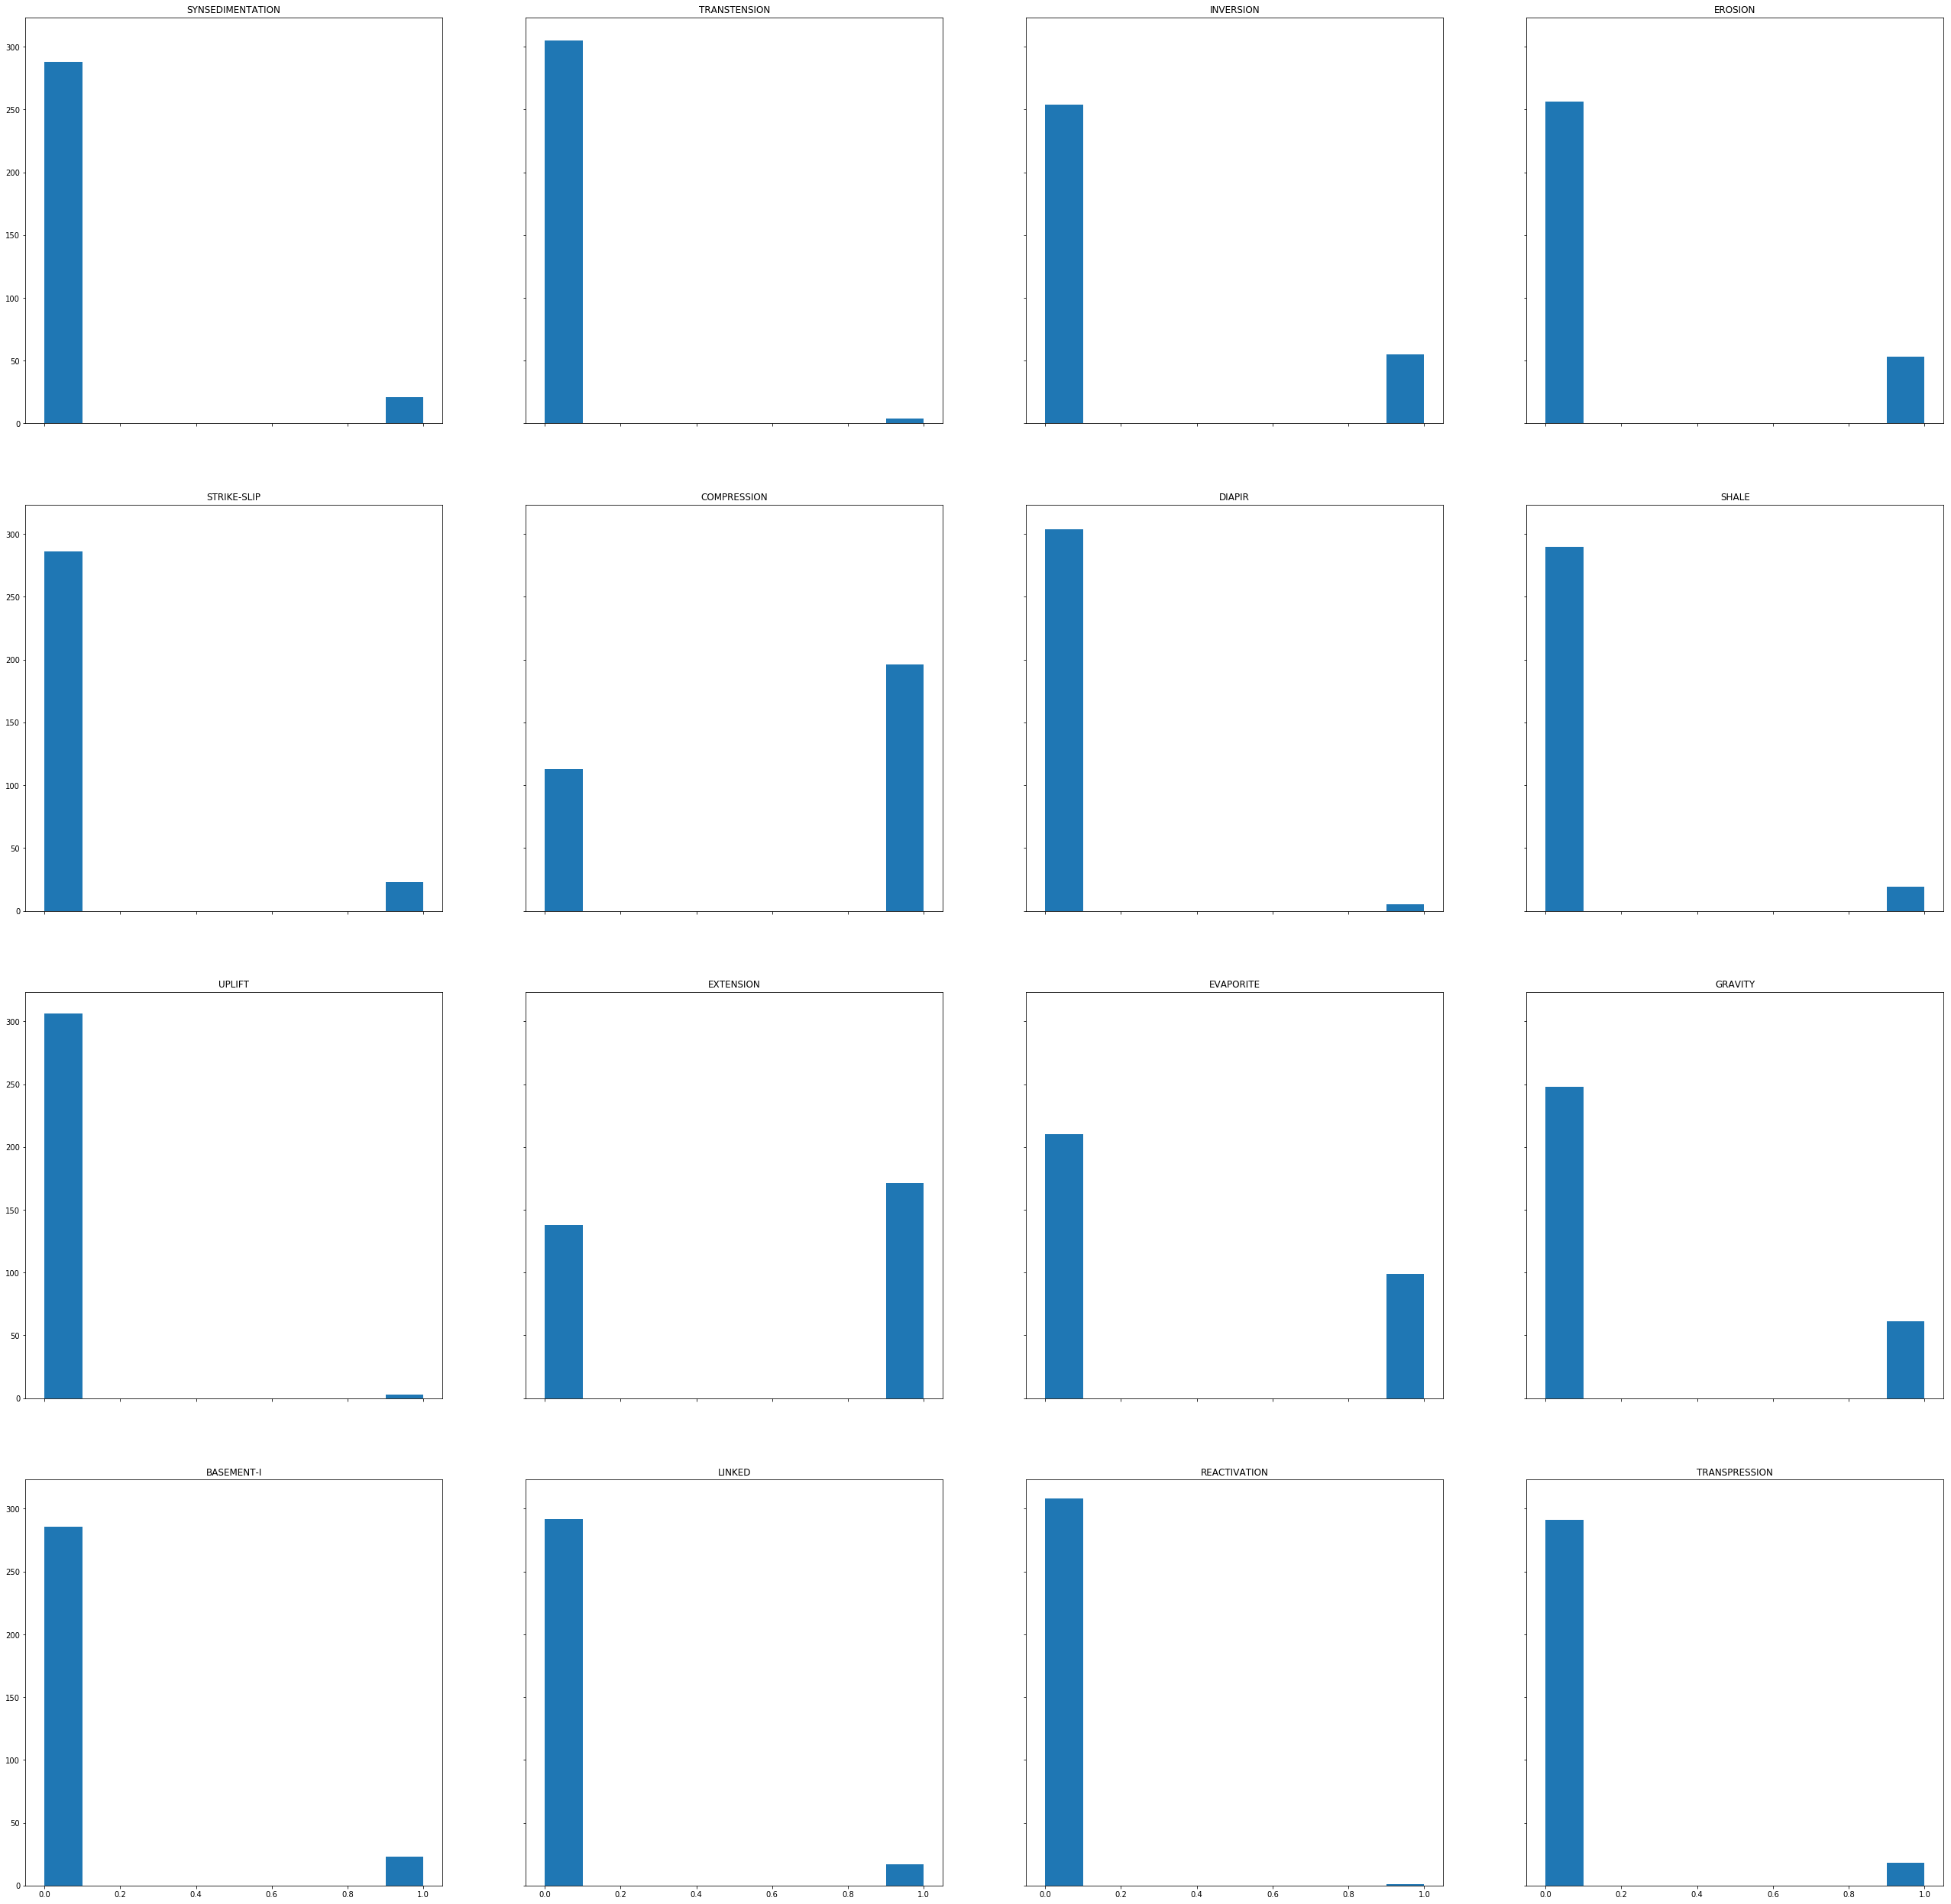

In [50]:
%matplotlib inline
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, sharey=True)
fig.set_size_inches(45, 45)
num = 0
list_hist = list(set_Tectonic_regime)
for i in range(4):
    for j in range(4):
        axes[i][j].hist(data[list_hist[num]])
        axes[i][j].set_title(list_hist[num])
        num += 1
fig.show()

C:\WPy-3670\python-3.6.7\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


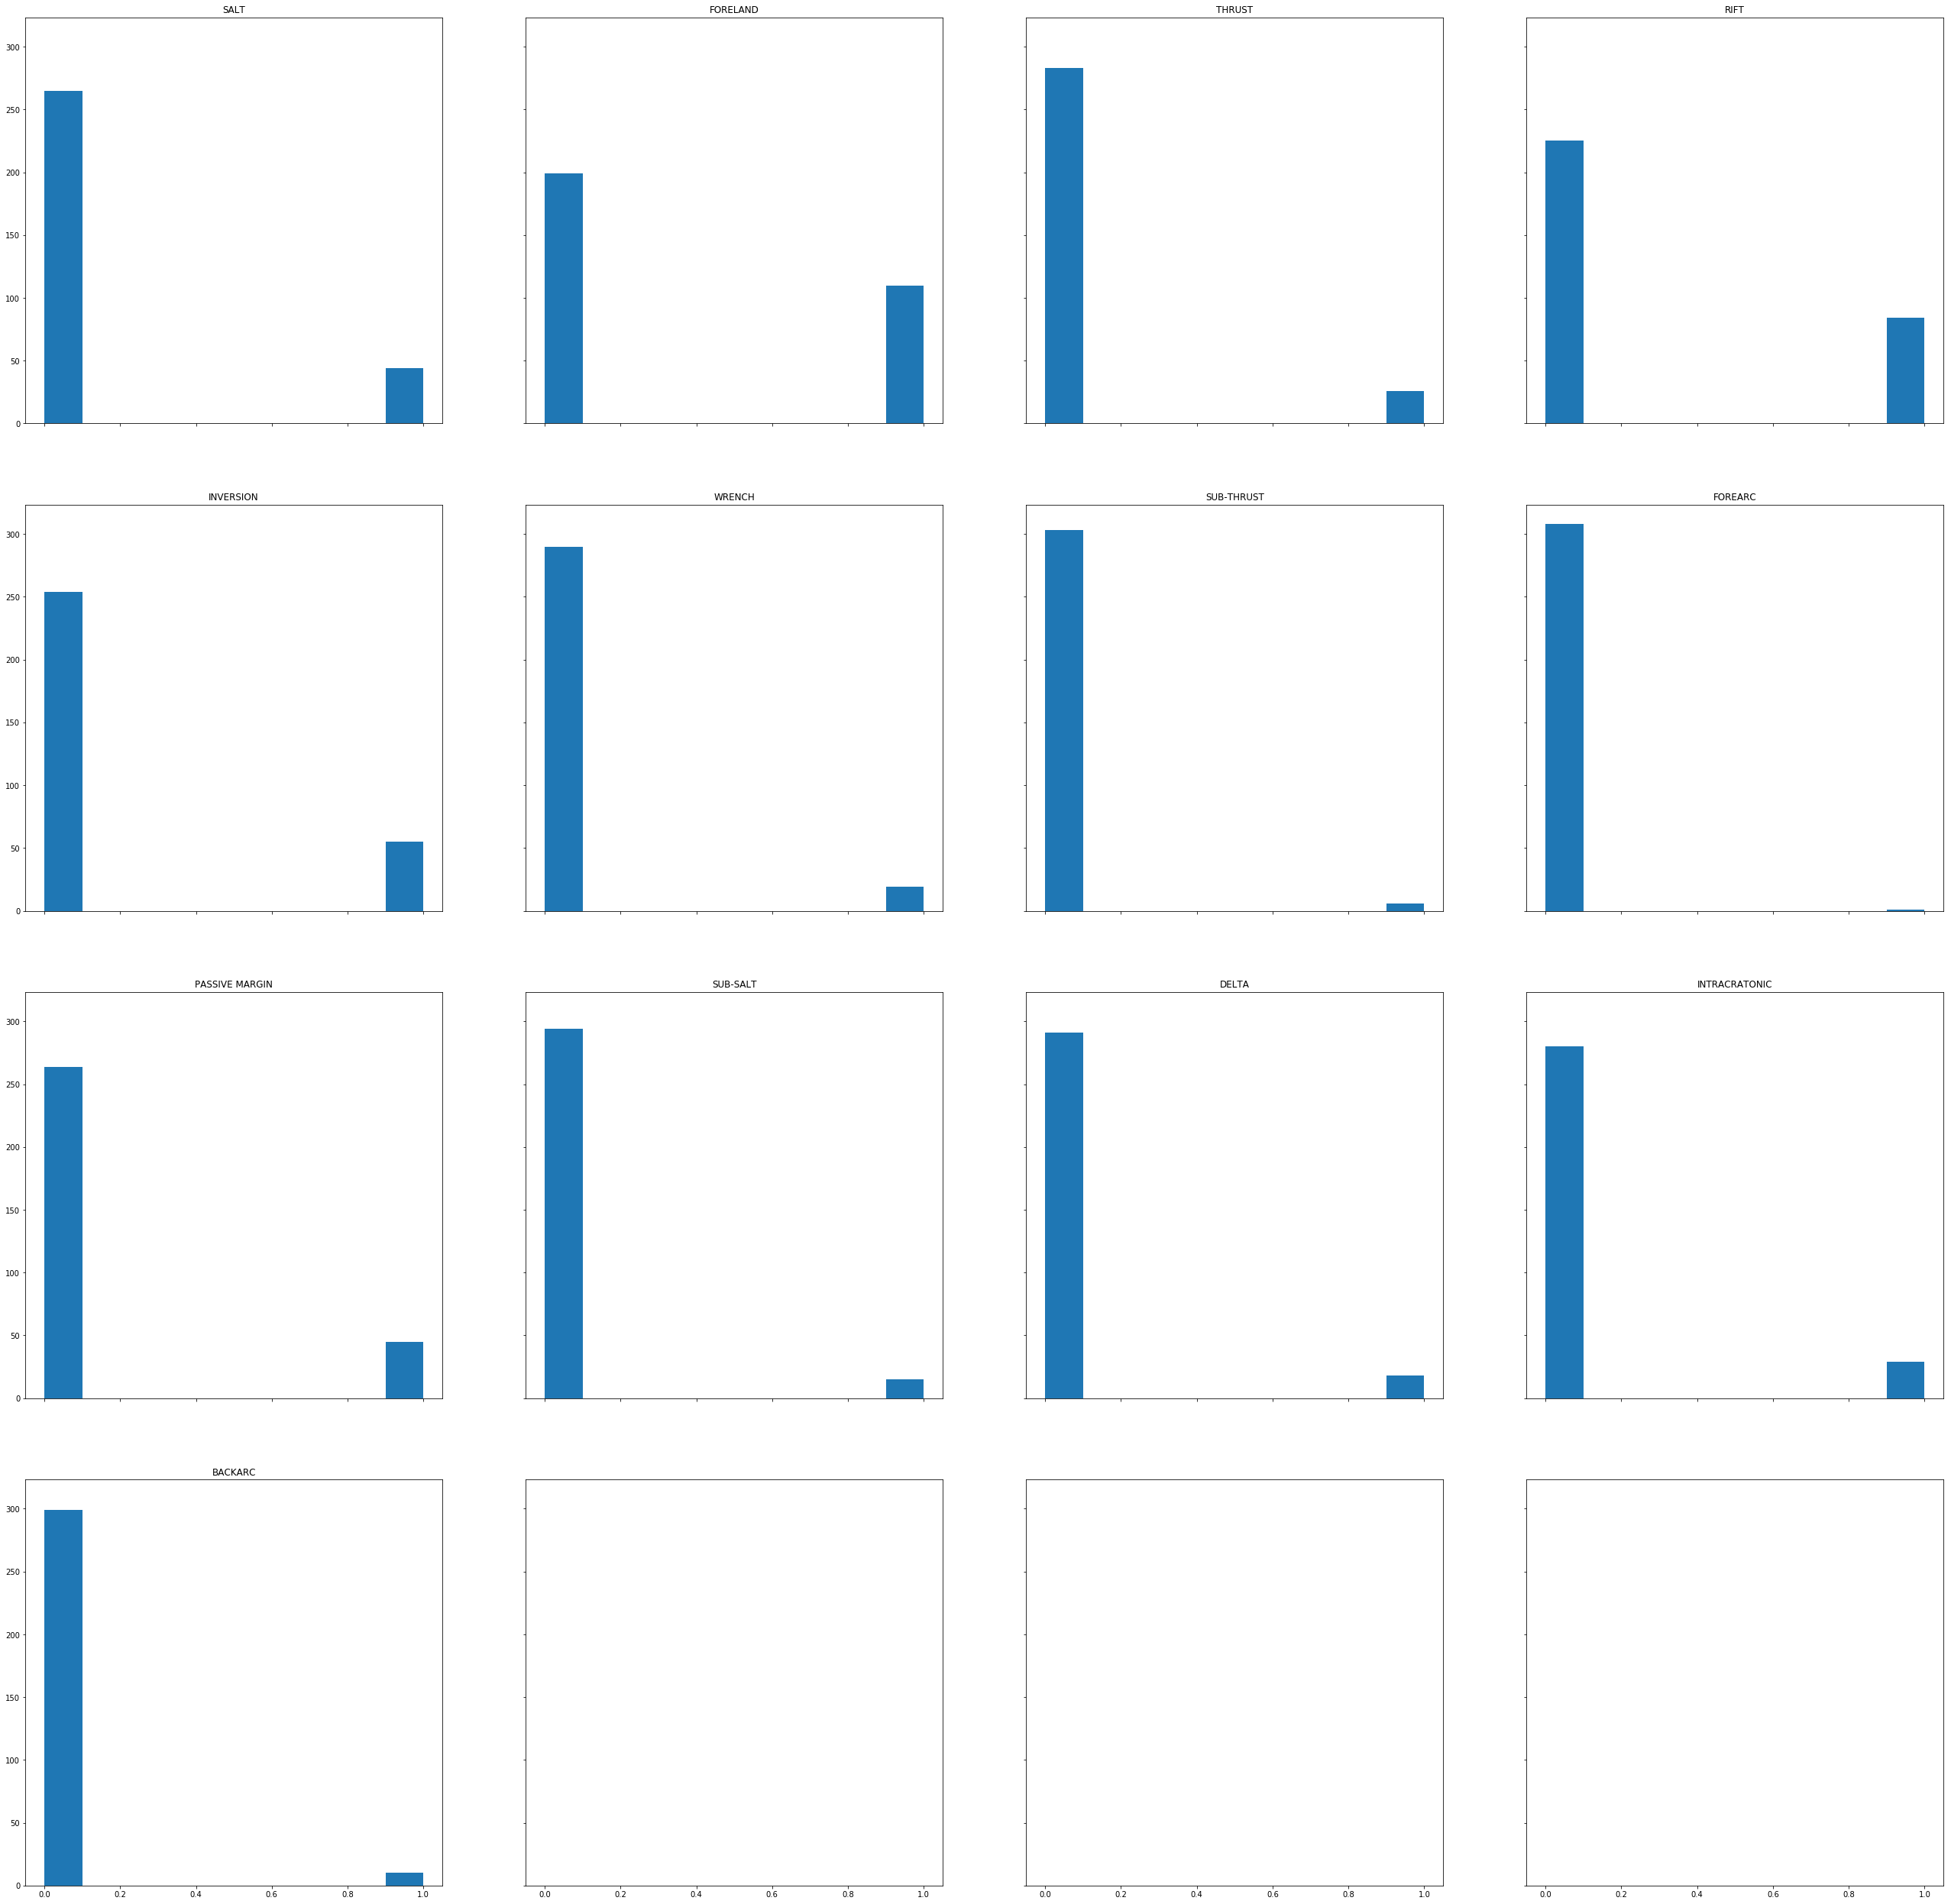

In [51]:
%matplotlib inline
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, sharey=True)
fig.set_size_inches(45, 45)
num = 0
list_hist = list(set_Structural_setting)
for i in range(4):
    for j in range(4):
        axes[i][j].hist(data[list_hist[num]])
        axes[i][j].set_title(list_hist[num])
        num += 1
        if num == 13:
            break
    if num > 12:
        break
fig.show()

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

def replace_name_to_numeric(data):
    replace_Hydrocarbon_type = {'CARBON DIOXIDE':0, 'GAS':1, 'GAS-CONDENSATE':2, 'METHANE HYDRATE':3, 'OIL':4}
    replace_Reservoir_status = {'ABANDONED': 0,
                                 'CONTINUING DEVELOPMENT': 1,
                                 'DECLINING PRODUCTION': 2,
                                 'DEPLETED': 3,
                                 'DEVELOPING': 4,
                                 'MATURE PRODUCTION': 5,
                                 'NEARLY DEPLETED': 6,
                                 'PLATEAU PRODUCTION': 7,
                                 'REJUVENATING': 8,
                                 'SECOND PLATEAU PRODUTION': 9,
                                 'UNDEVELOPED': 10,
                                 'UNKNOWN': 11}
    replace_Period = {'ARCHEAN': 0,
                         'CAMBRIAN': 1,
                         'CAMBRIAN-ORDOVICIAN':2,
                         'CARBONIFEROUS':3,
                         'CARBONIFEROUS-CRETACEOUS':4,
                         'CARBONIFEROUS-PERMIAN':5,
                         'CRETACEOUS':6,
                         'CRETACEOUS-PALEOGENE':7,
                         'DEVONIAN':8,
                         'JURASSIC':9,
                         'JURASSIC-CRETACEOUS':10,
                         'MESOZOIC':11,
                         'NEOGENE':12,
                         'ORDOVICIAN':13,
                         'PALEOGENE':14,
                         'PALEOGENE-NEOGENE':15,
                         'PALEOZOIC':16,
                         'PERMIAN':17,
                         'PROTEROZOIC':18,
                         'PROTEROZOIC-CAMBRIAN':19,
                         'TRIASSIC':20,
                         'TRIASSIC-JURASSIC':21}
    replace_Lithology = {'BASEMENT':0,
                         'CHALK':1,
                         'CHALKY LIMESTONE':2,
                         'CHERT':3,
                         'CONGLOMERATE':4,
                         'DIATOMITE':5,
                         'DOLOMITE':6,
                         'DOLOMITIC LIMESTONE':7,
                         'LIMESTONE':8,
                         'LOW-RESISTIVITY SANDSTONE':9,
                         'SANDSTONE':10,
                         'SHALE':11,
                         'SHALY SANDSTONE':12,
                         'SILTSTONE':13,
                         'THINLY-BEDDED SANDSTONE':14,
                         'VOLCANICS':15}
    data['Period'] = data["Period"].apply(lambda x: replace_Period.get(x, -1))
    data['Hydrocarbon type'] = data["Hydrocarbon type"].apply(lambda x: replace_Hydrocarbon_type.get(x, -1))
    data['Reservoir status'] = data["Reservoir status"].apply(lambda x: replace_Reservoir_status.get(x, -1))
    data['Lithology'] = data["Lithology"].apply(lambda x: replace_Lithology.get(x,-1))
    
y = data['Onshore/Offshore']
del data['Onshore/Offshore']
replace_class = {'OFFSHORE': 0, 'ONSHORE-OFFSHORE':1, 'ONSHORE':2}
y = y.apply(lambda x: replace_class[x])

replace_name_to_numeric(data)
x = data
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.25)
X_train.head()

,Hydrocarbon type,Reservoir status,Depth,Period,Lithology,Gross,Netpay,Porosity,Permeability,SALT,...,DIAPIR,SHALE,UPLIFT,EXTENSION,EVAPORITE,GRAVITY,BASEMENT-I,LINKED,REACTIVATION,TRANSPRESSION
106,4,5,2433,6,2,1324.0,439.0,19.0,2.6,1,...,0,0,0,0,1,0,0,0,0,0
29,4,7,4478,6,2,200.0,110.0,27.0,7.0,1,...,0,0,0,1,1,1,0,0,0,0
153,4,2,3347,6,10,62.5,18.0,26.0,2500.0,0,...,0,0,0,0,0,0,0,0,0,0
20,4,11,9959,9,10,180.0,144.0,18.0,200.0,0,...,0,0,0,1,0,0,0,0,0,0
46,4,2,7000,12,10,60.0,33.0,25.0,400.0,0,...,0,0,0,0,0,0,1,0,0,0


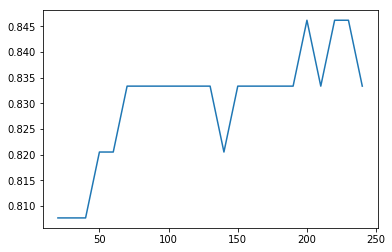

In [53]:
accuracy = []
for i in range(20,250,10):
    gbc = GradientBoostingClassifier(n_estimators = i, learning_rate = 0.1, max_depth = 4, random_state = 5)
    gbc.fit(X_train,y_train)
    accuracy.append(gbc.score(X_test, y_test))
plt.plot(range(20,250,10), accuracy)
plt.show()

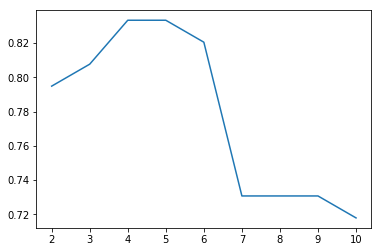

In [54]:
accuracy = []
for i in range(2,11,1):
    gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = i, random_state = 5)
    gbc.fit(X_train,y_train)
    accuracy.append(gbc.score(X_test, y_test))
plt.plot(range(2,11,1), accuracy)
plt.show()

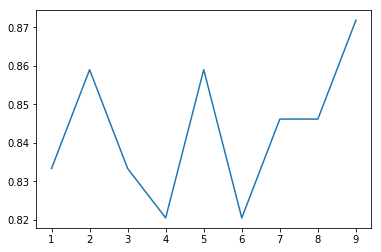

In [55]:
accuracy = []
for i in range(1,10,1):
    gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1*i, max_depth = 5, random_state = 5)
    gbc.fit(X_train,y_train)
    accuracy.append(gbc.score(X_test, y_test))
plt.plot(range(1,10,1), accuracy)
plt.show()

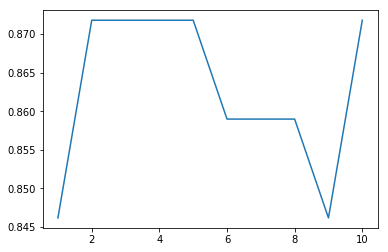

In [56]:
accuracy = []
for i in range(1,11):
    gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.3, 
                                     max_depth = 5, random_state = i,max_features='sqrt')
    gbc.fit(X_train,y_train)
    accuracy.append(gbc.score(X_test, y_test))
plt.plot(range(1,11), accuracy)
plt.show()

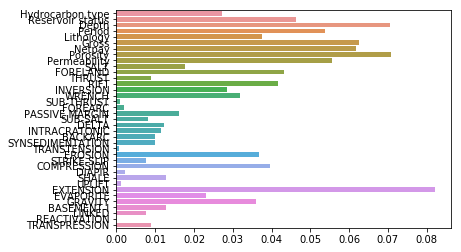

In [57]:
from sklearn.ensemble import ExtraTreesClassifier

f_importance = ExtraTreesClassifier(n_estimators = 100, criterion="entropy")
f_importance.fit(X_train,y_train)
sns.barplot(y=list(x.columns), x=f_importance.feature_importances_)
mpl.rcParams['figure.dpi'] = mpl.rcParamsDefault['figure.dpi']*4
mpl.rcParams['figure.figsize'] = (20,20)
plt.show()

In [58]:
mpl.rcParams['figure.dpi'] = mpl.rcParamsDefault['figure.dpi']

In [59]:
f_importance.score(X_test, y_test)

0.8717948717948718

In [74]:
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers import Dense
from keras.utils import np_utils

model = Sequential()
model.add(Dense(20, input_dim=37, init="uniform", activation="relu"))
model.add(Dense(10, activation="relu", kernel_initializer="uniform"))
model.add(Dense(3))
model.add(Activation("softmax"))

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [60]:
test = pd.read_csv('D:\\DataMining\\occurrence\\test.csv')
test.head()

,Tectonic regime,Hydrocarbon type,Reservoir status,Structural setting,Depth,Period,Lithology,Gross,Netpay,Porosity,Permeability
0,COMPRESSION,GAS,MATURE PRODUCTION,FORELAND,2275,PERMIAN,SANDSTONE,325.0,30.0,13.0,0.04
1,INVERSION/COMPRESSION/EXTENSION/EROSION,OIL,ABANDONED,FORELAND,500,PERMIAN,SANDSTONE,40.0,18.0,28.0,240.00
2,INVERSION/COMPRESSION/EXTENSION/EVAPORITE,GAS,DECLINING PRODUCTION,INVERSION/RIFT,5548,JURASSIC,DOLOMITE,200.0,20.0,13.0,7.30
3,COMPRESSION/EVAPORITE/EXTENSION/LINKED,OIL,DEVELOPING,THRUST,10100,NEOGENE,SANDSTONE,8200.0,260.0,18.0,100.00
4,COMPRESSION/EROSION,GAS-CONDENSATE,MATURE PRODUCTION,FORELAND,8750,CARBONIFEROUS,DOLOMITE,140.0,70.0,12.0,125.00


In [61]:
transformation_data_structural_setting_and_tectonic_regime(test)
replace_name_to_numeric(test)
test.head()

,Hydrocarbon type,Reservoir status,Depth,Period,Lithology,Gross,Netpay,Porosity,Permeability,SALT,...,DIAPIR,SHALE,UPLIFT,EXTENSION,EVAPORITE,GRAVITY,BASEMENT-I,LINKED,REACTIVATION,TRANSPRESSION
0,1,5,2275,17,10,325.0,30.0,13.0,0.04,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,500,17,10,40.0,18.0,28.0,240.00,0,...,0,0,0,1,0,0,0,0,0,0
2,1,2,5548,9,6,200.0,20.0,13.0,7.30,0,...,0,0,0,1,1,0,0,0,0,0
3,4,4,10100,12,10,8200.0,260.0,18.0,100.00,0,...,0,0,0,1,1,0,0,1,0,0
4,2,5,8750,3,6,140.0,70.0,12.0,125.00,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
test.shape

(133, 37)

In [63]:
# 84% accuracy
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.3, 
                                     max_depth = 5, max_features='sqrt')
gbc.fit(x,y)


GradientBoostingClassifier(learning_rate=0.3, max_depth=5, max_features='sqrt')

In [64]:
res_prob = gbc.predict_proba(test)
res_prob

array([[3.81149075e-06, 1.10736314e-12, 9.99996189e-01],
       [3.82051950e-05, 5.24713988e-11, 9.99961795e-01],
       [5.78571150e-01, 4.12684203e-10, 4.21428849e-01],
       [5.35908011e-01, 2.01202229e-10, 4.64091989e-01],
       [3.83701625e-07, 7.50313016e-13, 9.99999616e-01],
       [9.82194890e-01, 9.80129049e-11, 1.78051098e-02],
       [2.76170610e-06, 4.01885693e-13, 9.99997238e-01],
       [2.85602879e-08, 2.95194283e-14, 9.99999971e-01],
       [1.76699252e-06, 2.57638682e-12, 9.99998233e-01],
       [9.75614844e-04, 2.26412573e-11, 9.99024385e-01],
       [9.99140346e-01, 1.21577960e-10, 8.59654259e-04],
       [9.99959808e-01, 1.01339342e-11, 4.01919175e-05],
       [3.17466406e-03, 2.92137579e-10, 9.96825336e-01],
       [6.74106929e-08, 6.13530853e-13, 9.99999933e-01],
       [6.53863297e-01, 4.05199716e-11, 3.46136703e-01],
       [1.36791077e-06, 2.92265581e-12, 9.99998632e-01],
       [3.36474792e-02, 3.80277734e-11, 9.66352521e-01],
       [4.31640147e-03, 1.00320

In [65]:
res = []
for i in range(len(res_prob)):
    if abs(res_prob[i][2] - res_prob[i][0]) < 0.15:
        res.append(1)
    elif res_prob[i][2] > res_prob[i][1] and res_prob[i][2] > res_prob[i][0]:
        res.append(2)
    elif res_prob[i][1] > res_prob[i][2] and res_prob[i][1] > res_prob[i][0]:
        res.append(1)
    else:
        res.append(0)
res

[2,
 2,
 0,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2]

In [66]:
extra_tree = ExtraTreesClassifier(n_estimators = 120, criterion = 'entropy')
extra_tree.fit(x,y)
res_tree = extra_tree.predict(test)
res_tree

array([2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2,
       2], dtype=int64)

In [67]:
# 86%
gbc = GradientBoostingClassifier(n_estimators = 80, learning_rate = 0.3, 
                                     max_depth = 6, max_features='sqrt')
gbc.fit(x,y)
res_gb = gbc.predict(test)
res_gb

array([2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2], dtype=int64)

In [68]:
res = [] 
for i in range(len(res_gb)):
    if res_tree[i] == res_gb[i]:
        res.append(res_gb[i])
    else:
        res.append(int(res_gb[i]/2 + res_tree[i]/2))
res[0:5]

[2, 2, 1, 0, 2]

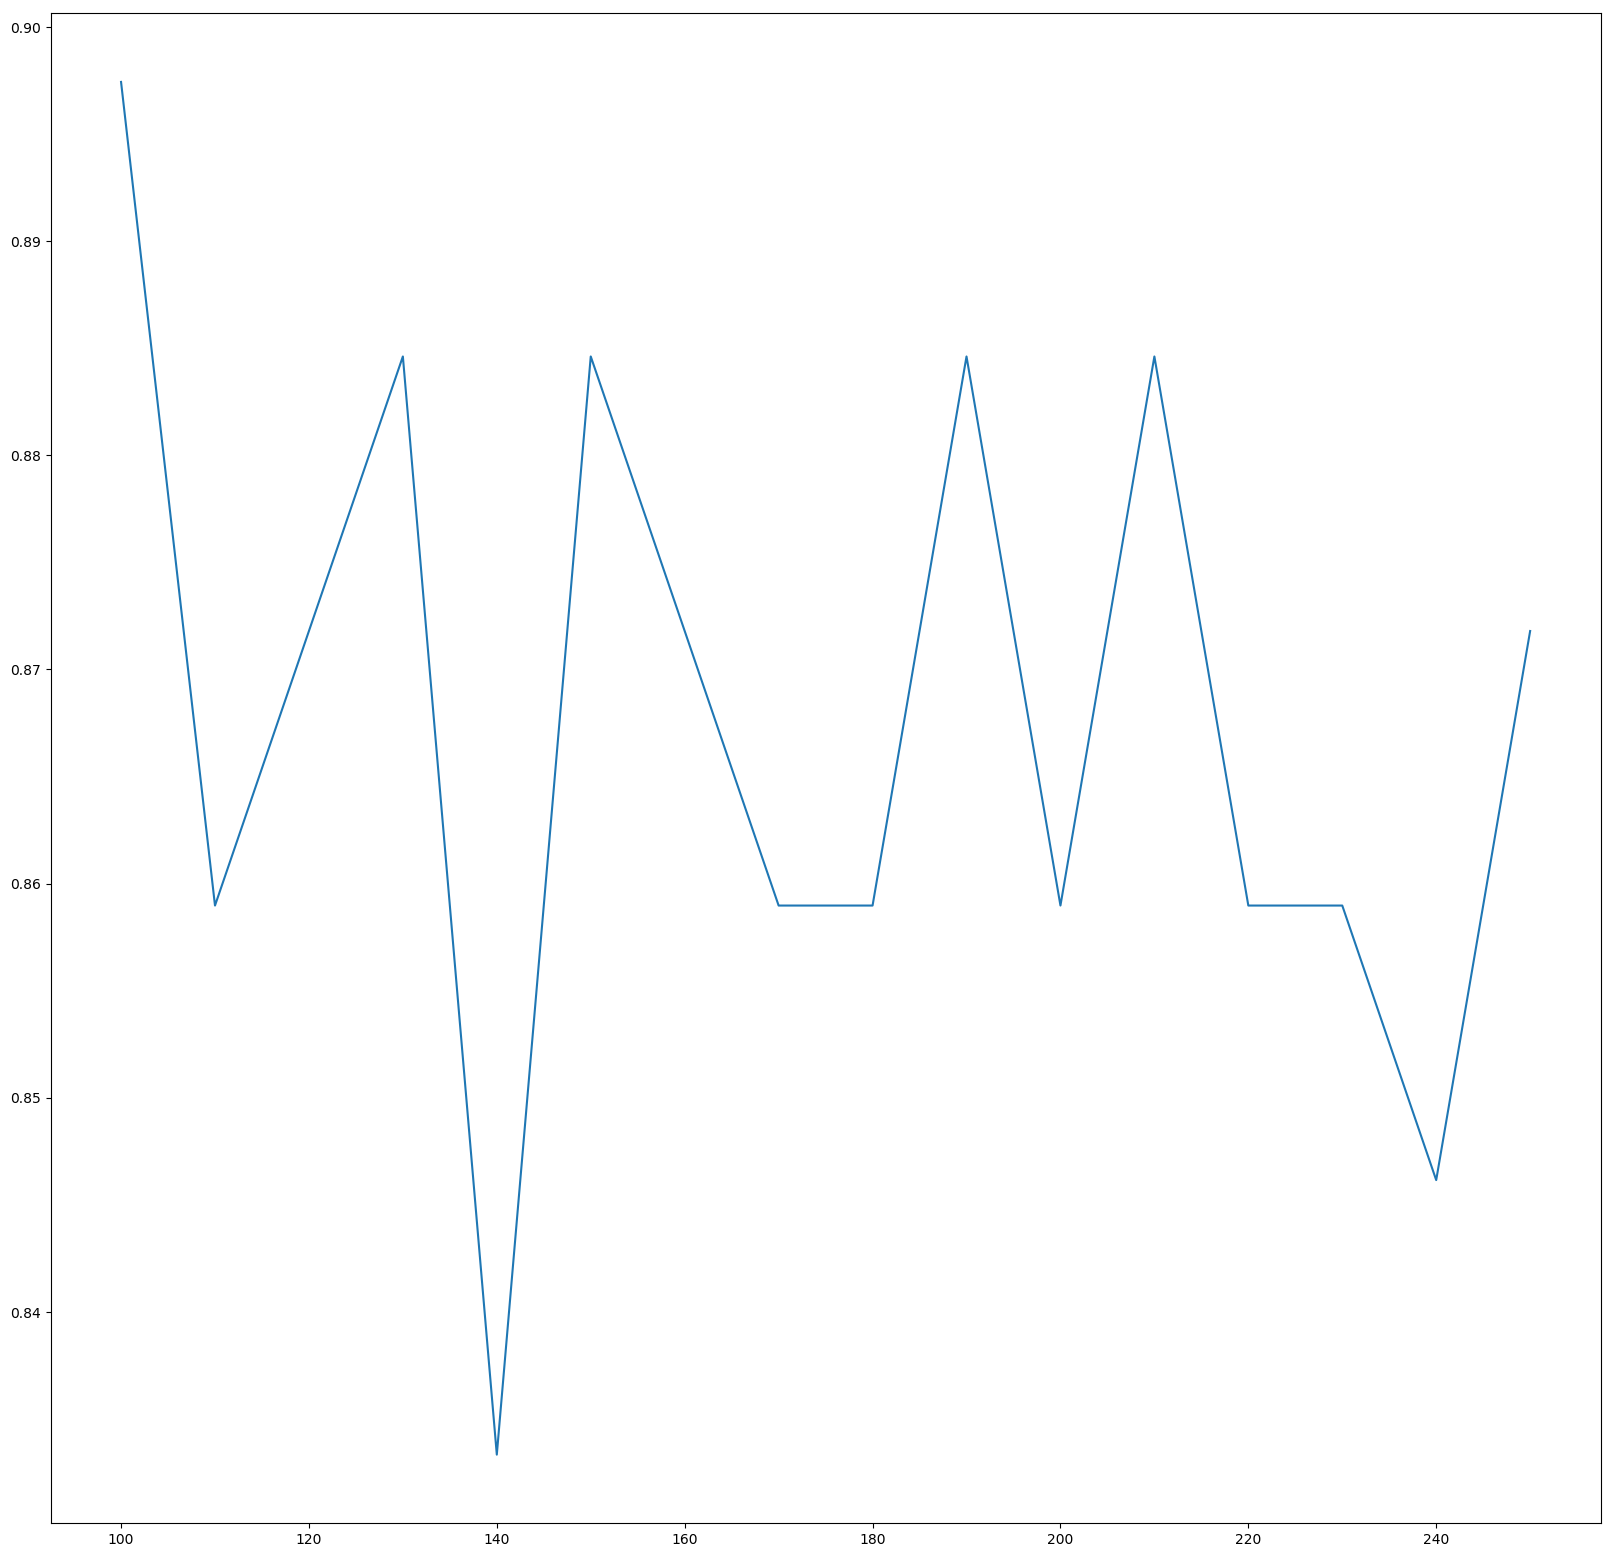

In [69]:
from sklearn.ensemble import RandomForestClassifier

accuracy = []
for i in range(100, 260,10):
    rfc = RandomForestClassifier(n_estimators = i, max_features='auto' )
    rfc.fit(X_train,y_train)
    accuracy.append(rfc.score(X_test, y_test))
plt.plot(range(100, 260,10), accuracy)
plt.show()

C:\WPy-3670\python-3.6.7\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\WPy-3670\python-3.6.7\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\WPy-3670\python-3.6.7\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


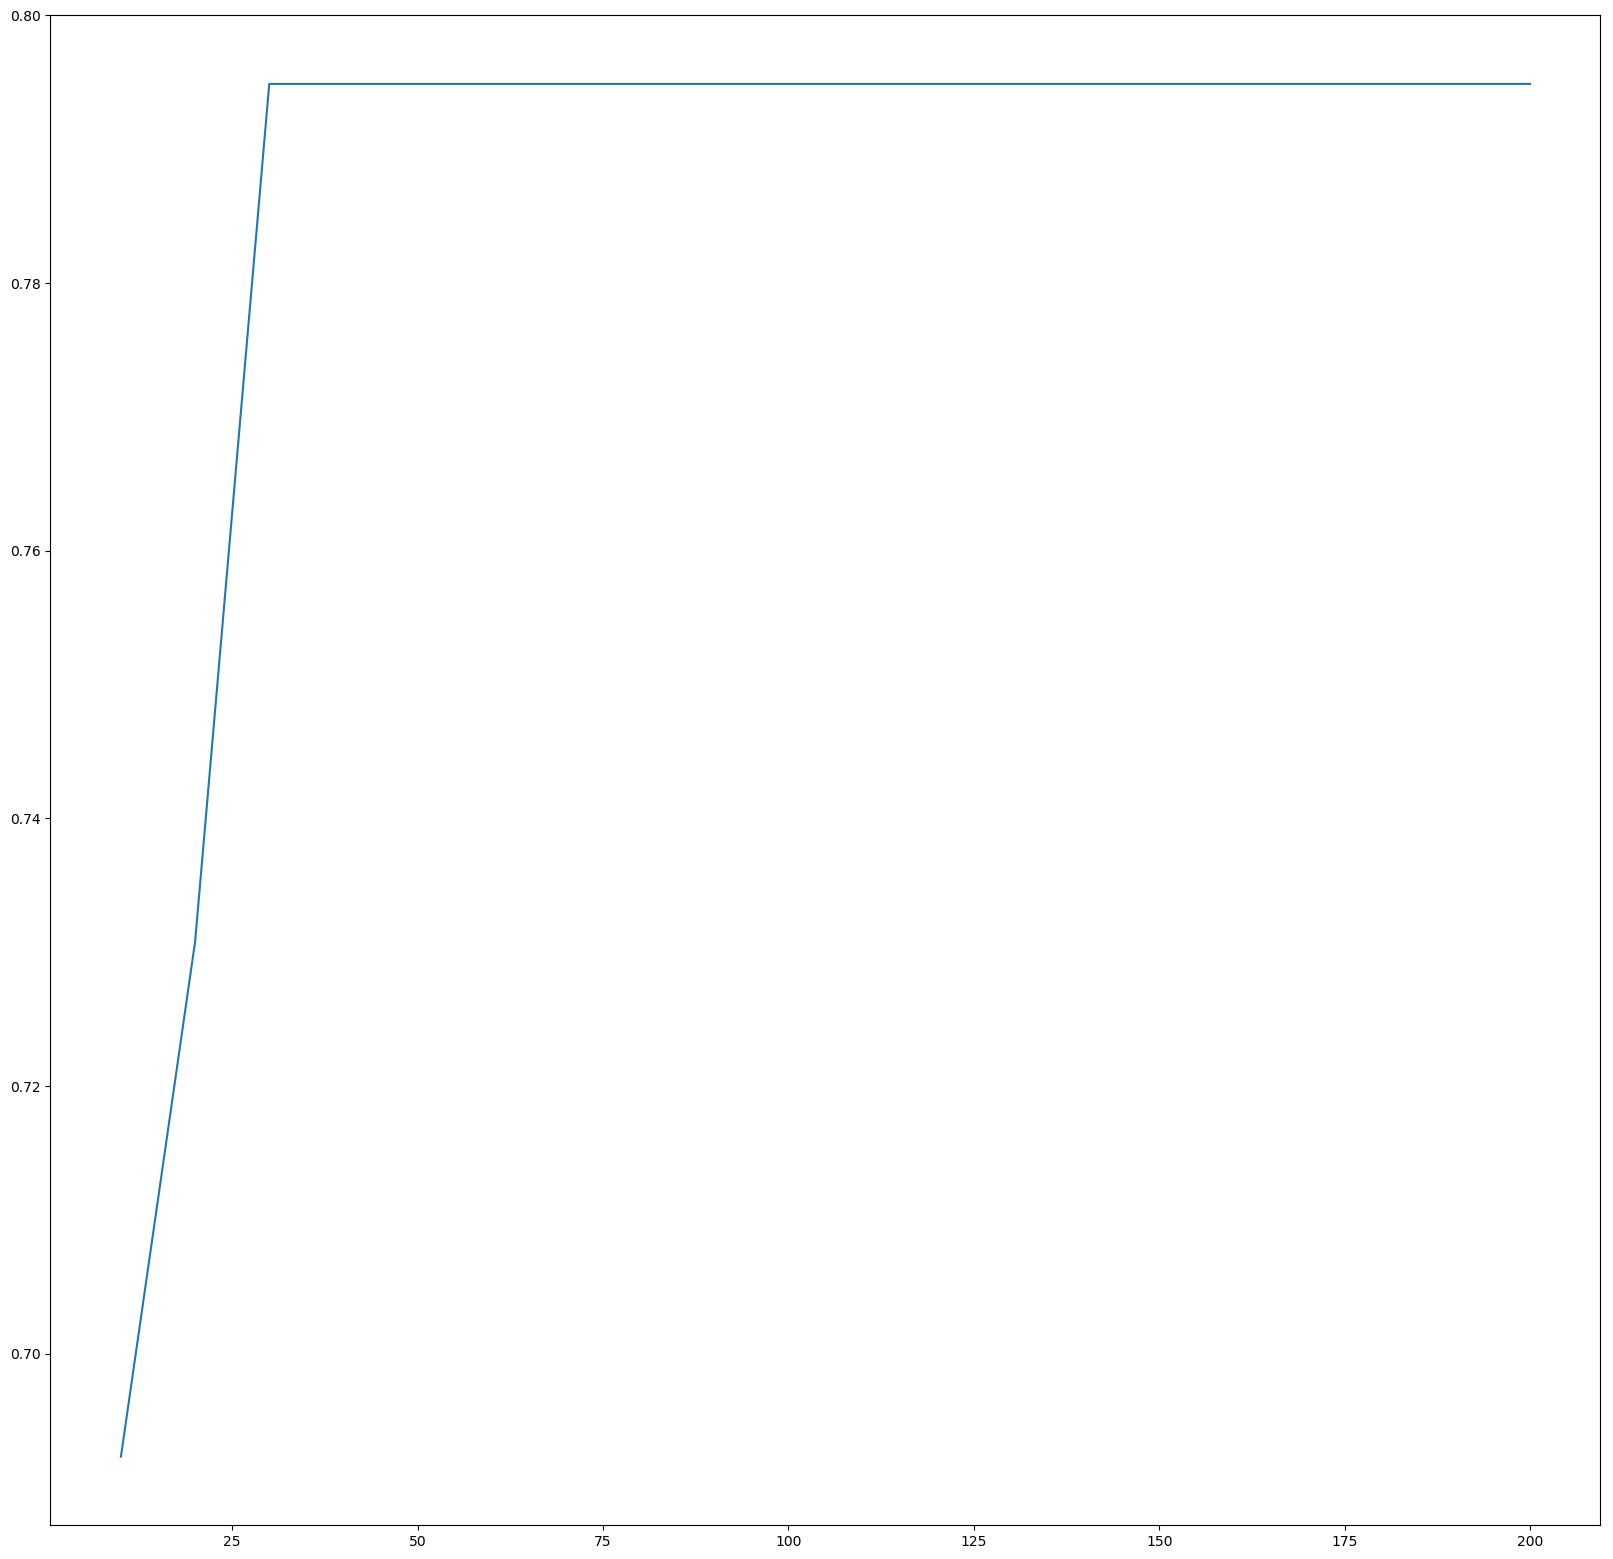

In [70]:
from sklearn.linear_model import LogisticRegression
acc = []
for i in range(10,210,10):
    logit = LogisticRegression(random_state=17,solver = 'liblinear', max_iter = i)
    logit.fit(X_train, y_train)
    acc.append(logit.score(X_test, y_test))
plt.plot(range(10,210,10), acc)
plt.show()  

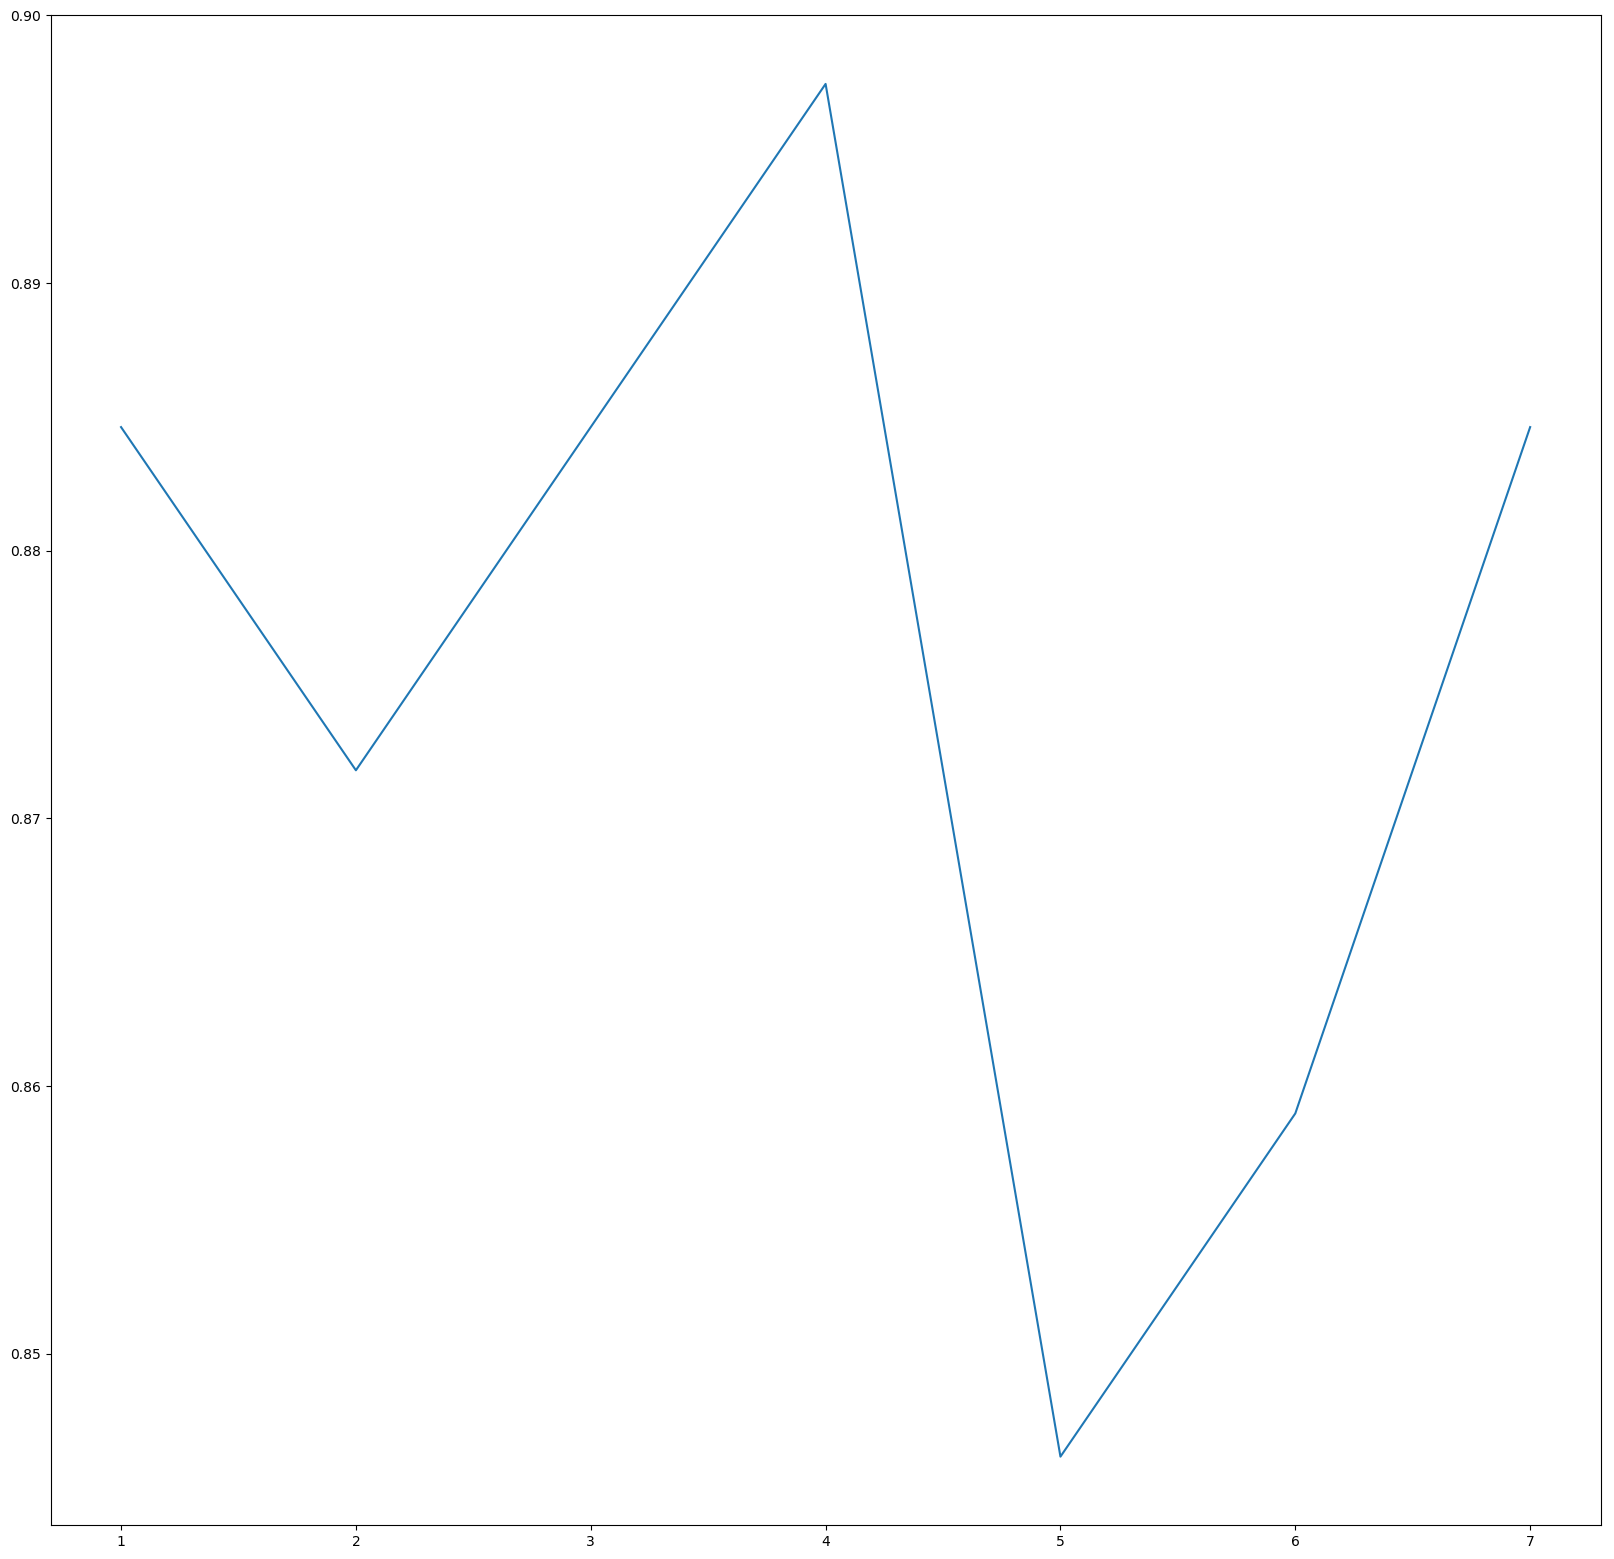

In [71]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
acc = []
for i in range(1,8,1):
    abc = AdaBoostClassifier(n_estimators = 120, base_estimator=ExtraTreesClassifier(n_estimators = 35, criterion = 'entropy'))
    abc.fit(X_train, y_train)
    acc.append(abc.score(X_test, y_test))
plt.plot(range(1,8,1), acc)
plt.show()  

In [72]:
abc = AdaBoostClassifier(n_estimators = 120, base_estimator=ExtraTreesClassifier(n_estimators = 10, criterion = 'entropy'))
abc.fit(x, y)
res = abc.predict_proba(test)
res

array([[2.22044605e-16, 2.22044605e-16, 1.00000000e+00],
       [2.22044605e-16, 2.22044605e-16, 1.00000000e+00],
       [2.00000000e-01, 2.22044605e-16, 8.00000000e-01],
       [5.00000000e-01, 1.00000000e-01, 4.00000000e-01],
       [2.22044605e-16, 1.00000000e-01, 9.00000000e-01],
       [5.00000000e-01, 2.22044605e-16, 5.00000000e-01],
       [2.22044605e-16, 2.22044605e-16, 1.00000000e+00],
       [2.22044605e-16, 2.22044605e-16, 1.00000000e+00],
       [2.22044605e-16, 2.22044605e-16, 1.00000000e+00],
       [1.00000000e-01, 2.22044605e-16, 9.00000000e-01],
       [9.00000000e-01, 2.22044605e-16, 1.00000000e-01],
       [7.00000000e-01, 2.22044605e-16, 3.00000000e-01],
       [1.00000000e-01, 2.22044605e-16, 9.00000000e-01],
       [2.22044605e-16, 2.22044605e-16, 1.00000000e+00],
       [5.00000000e-01, 2.22044605e-16, 5.00000000e-01],
       [2.22044605e-16, 2.22044605e-16, 1.00000000e+00],
       [4.00000000e-01, 2.22044605e-16, 6.00000000e-01],
       [5.00000000e-01, 2.22044

C:\WPy-3670\python-3.6.7\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\WPy-3670\python-3.6.7\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\WPy-3670\python-3.6.7\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\WPy-3670\python-3.6.7\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

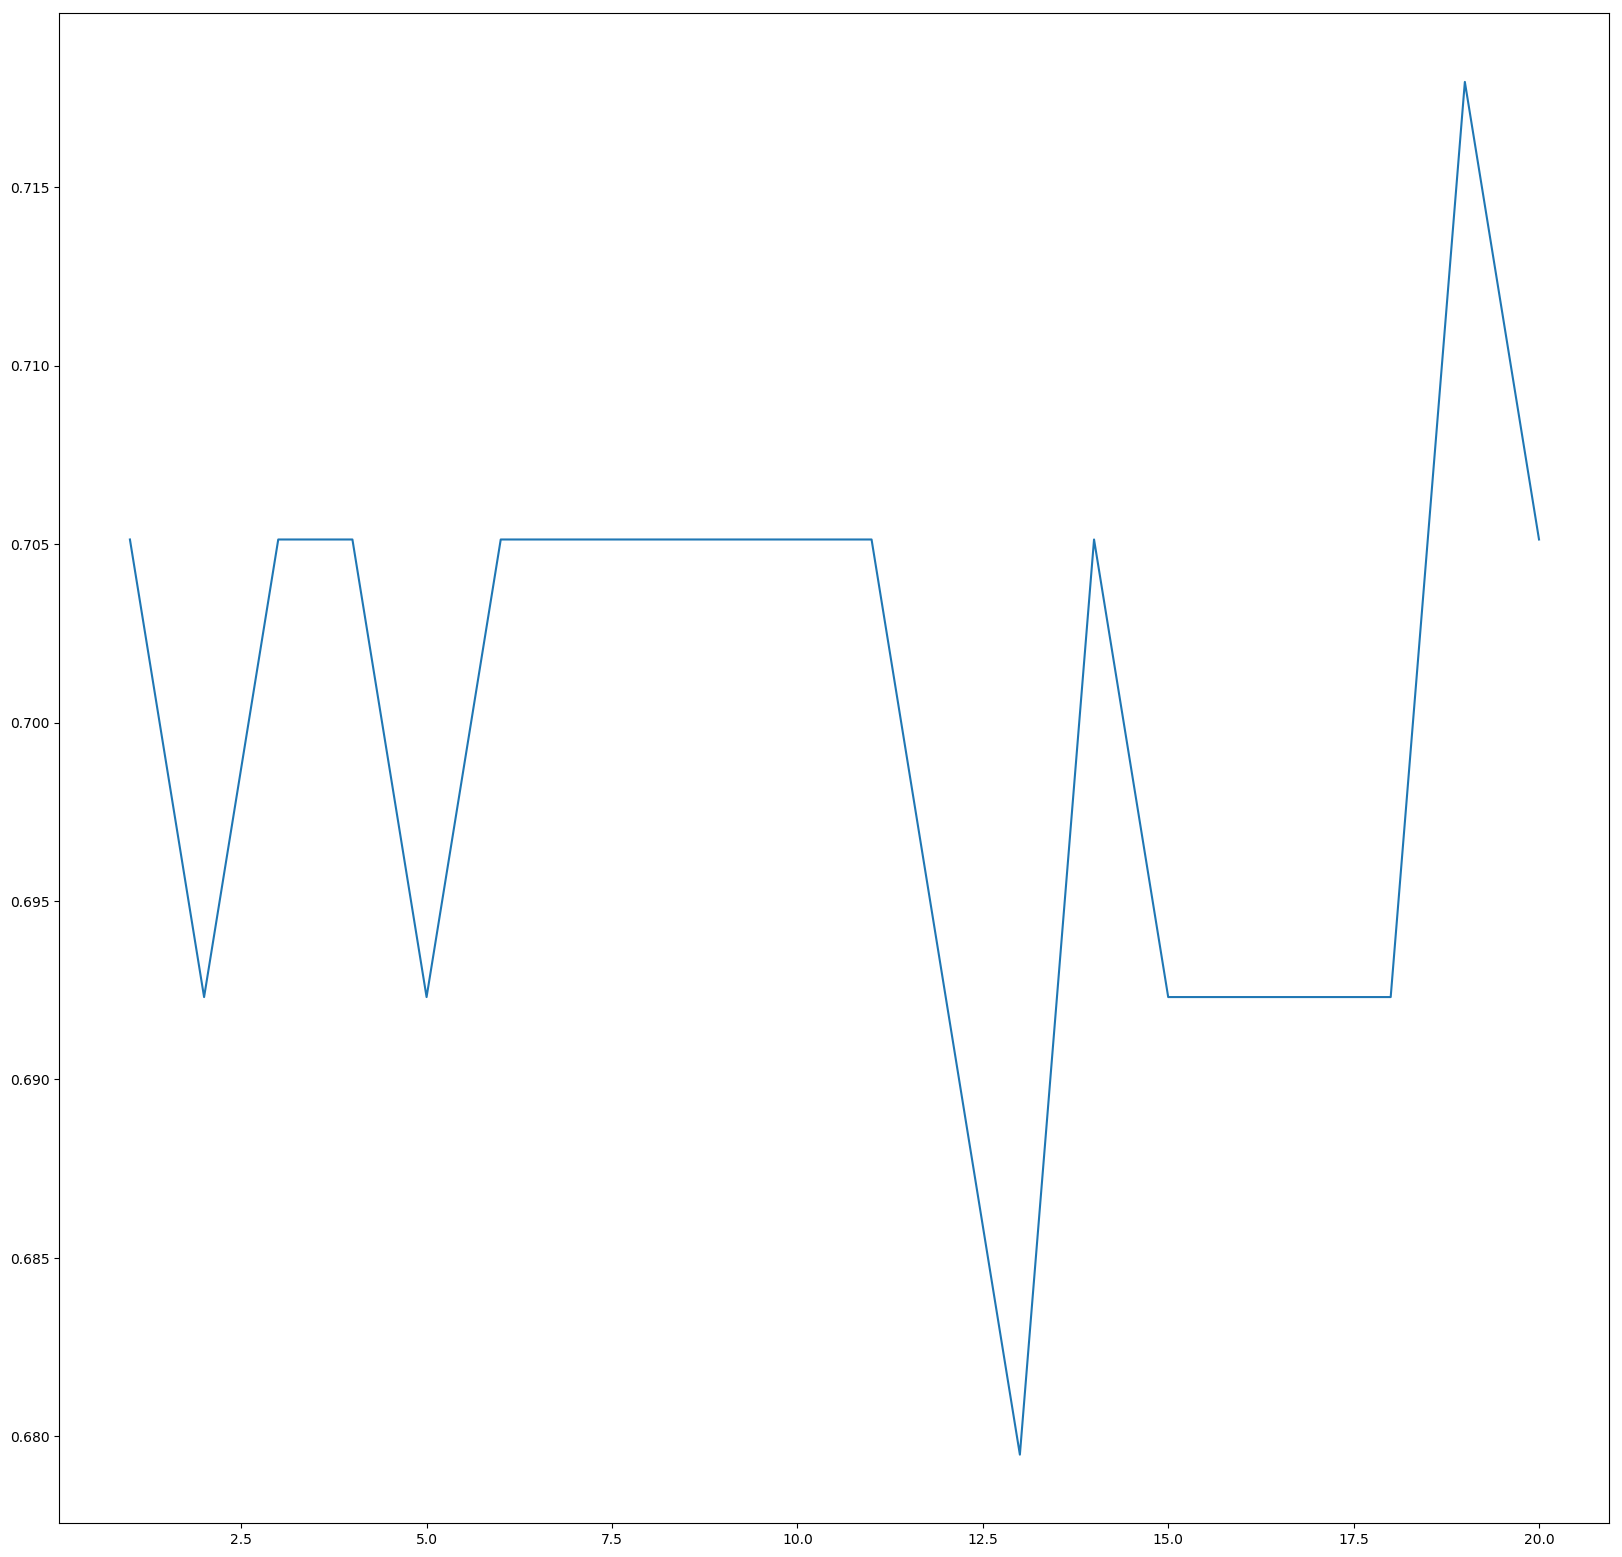

In [73]:
from sklearn.neural_network import MLPClassifier

acc = []
for i in range(1,21,1):
    nn = MLPClassifier(max_iter=100, activation='logistic', alpha = 0.01*i)
    nn.fit(X_train, y_train)
    acc.append(nn.score(X_test, y_test))
plt.plot(range(1,21,1), acc)
plt.show()  

### Сохранение результата

In [ ]:
import csv

dict_answer = {0:'OFFSHORE', 1:'ONSHORE-OFFSHORE', 2:'ONSHORE'}
answer_all = [dict_answer[answer] for answer in list(res)]
res_file = open('D:\\DataMining\\occurrence\\answer.csv', "w",newline='') 
writer = csv.writer(res_file, delimiter =',')
for answer in answer_all:
    writer.writerow([answer])
res_file.close()